

**Problem** **Statement**

When customer applies for home loan, the company validates the customer eligibility for loan. We want to automate the loan eligibility process based on customer details provided while filling online application form.

**Working approach**

1.   Importing required Libraries
2.   Loading dataset
2.   Exploratory Data Analysis
4.   Data Cleaning
5.   Handling categorical data
6.   Feature selection
7.   Model building
8.   Evoluation 






In [2]:
#import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


In [3]:
#load Data set
from google.colab import files
uploaded = files.upload()


Saving LoanApplicantData.csv to LoanApplicantData.csv


In [4]:
df = pd.read_csv("LoanApplicantData.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataframe has 13 columns with categorical as well as numerical varibles

In [7]:
#Checking for missing data
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Many columns has null value

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#map loan status "Y" to 1 and "N" to 0
df['Loan_Status']=df['Loan_Status'].map({"Y": 1, "N": 0})

In [12]:
df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64



**Exploratory Data Analysis**

In [13]:
def NumVar_targetPlots(df,segment_by,target_var = "Loan_Status"):
  fig, ax = plt.subplots(ncols= 2, figsize = (14,6)) 
  sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
  ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
  ax[1].set_title("Distribution of "+segment_by)
  ax[1].set_ylabel("Frequency")
  sns.distplot(a = df[segment_by].dropna(), ax=ax[1], kde=False)
  plt.show()

In [18]:
def CatVar_targetPlots(df, segment_by,invert_axis = False, target_var = "Loan_Status"):
  fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
  if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Loan_Status",ax=ax[0])
  else:
        sns.countplot(y = segment_by, data=df,hue="Loan_Status",ax=ax[0])
  ax[0].set_title("Comparision of " + segment_by + " vs " + "Loan_Status")
  if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
  else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
  ax[1].set_title("Loan_Status rate by {}".format(segment_by))
  ax[1].set_ylabel("Average(Loan_Status)")
  plt.tight_layout()

  plt.show()

In [19]:
#Numerical variables
num_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
print(num_var_names)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


In [20]:
#Categorical variables
cat_var_names = [ key for key in dict(df.dtypes)if dict(df.dtypes)[key] in ['object']]
print(cat_var_names)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


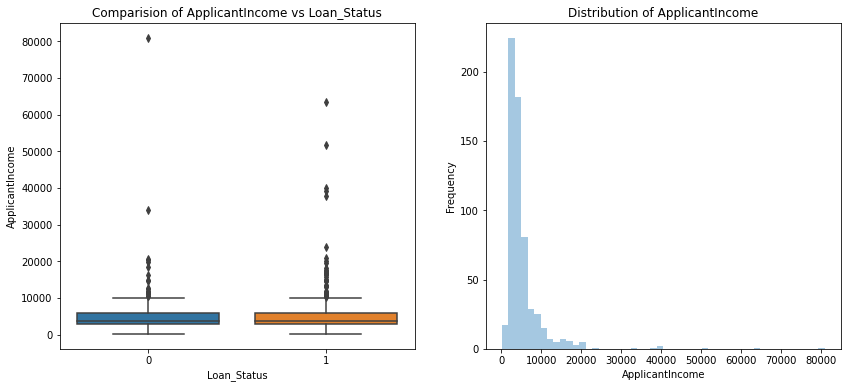

In [21]:
#Applicant Income
NumVar_targetPlots(df, segment_by = 'ApplicantIncome')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


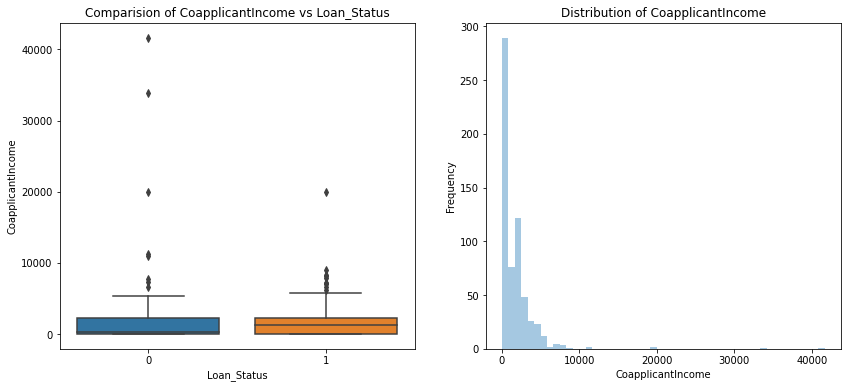

In [23]:
#Coapplicant Income
NumVar_targetPlots(df, segment_by = 'CoapplicantIncome')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


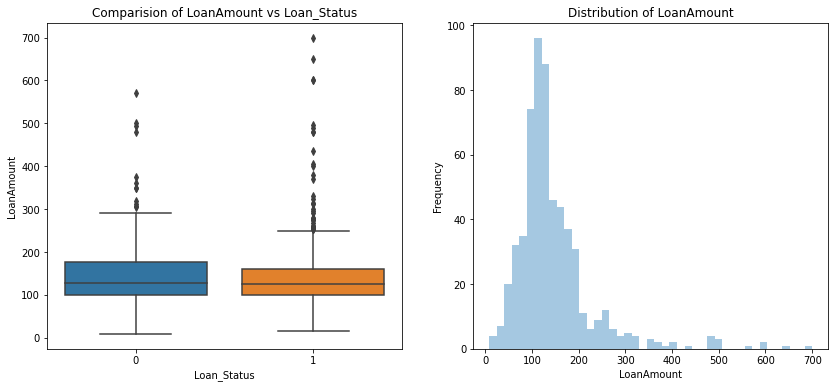

In [24]:
#Loan Amount
NumVar_targetPlots(df, segment_by = 'LoanAmount')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


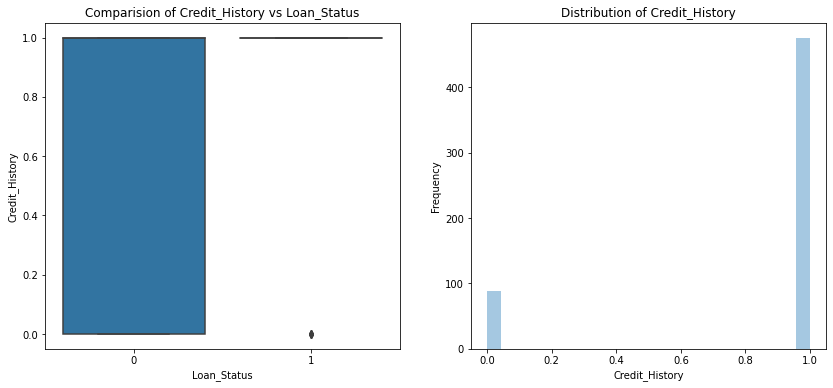

In [26]:
#Credit History
NumVar_targetPlots(df, segment_by = 'Credit_History')

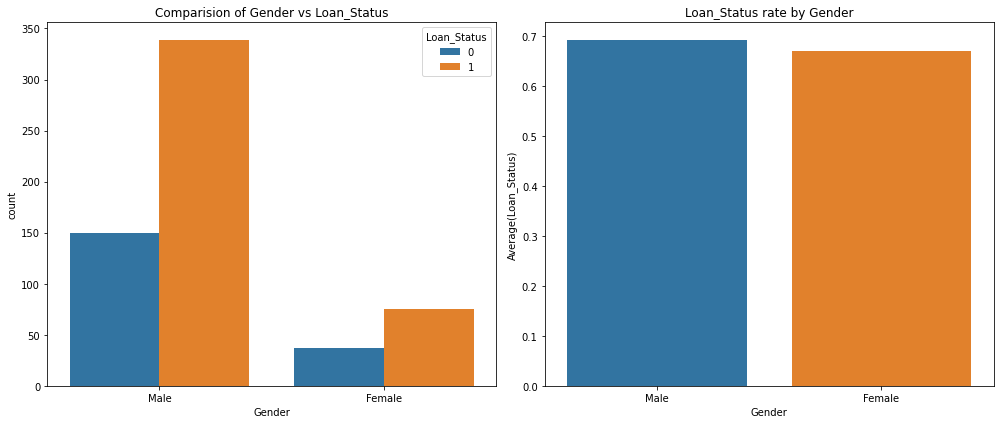

In [28]:
CatVar_targetPlots(df,"Gender")

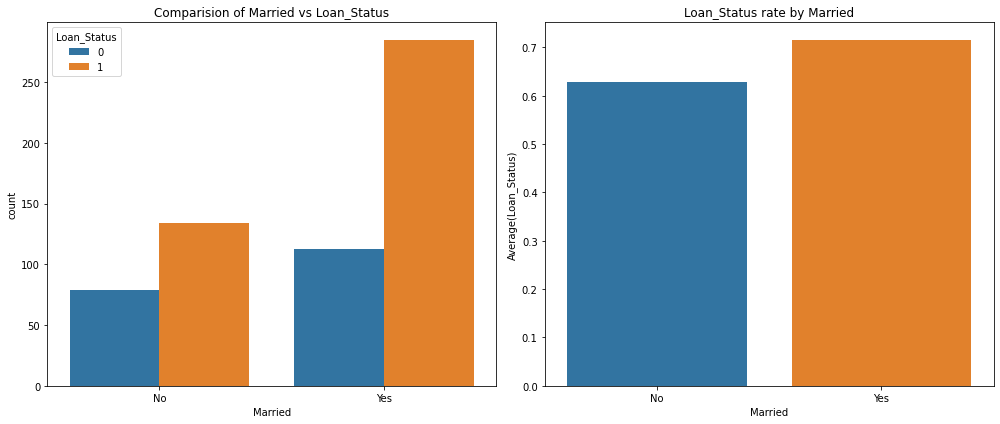

In [29]:
CatVar_targetPlots(df,"Married")

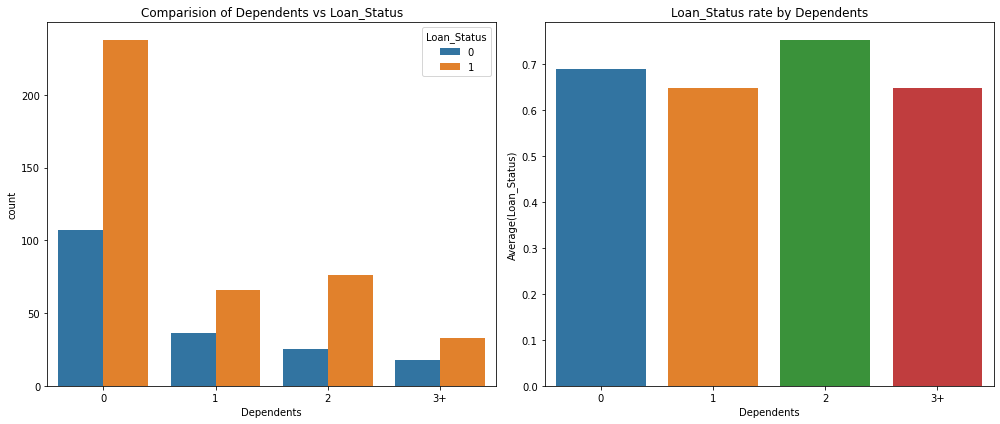

In [30]:
CatVar_targetPlots(df,"Dependents")

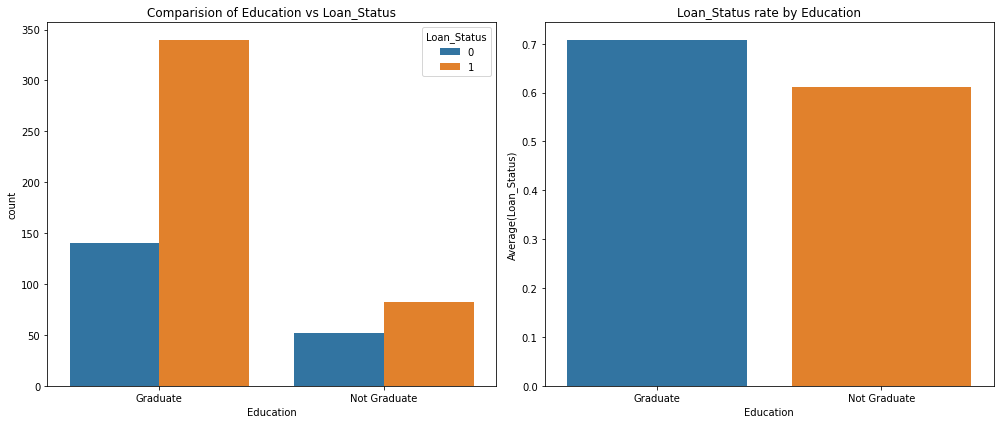

In [33]:
CatVar_targetPlots(df,"Education")

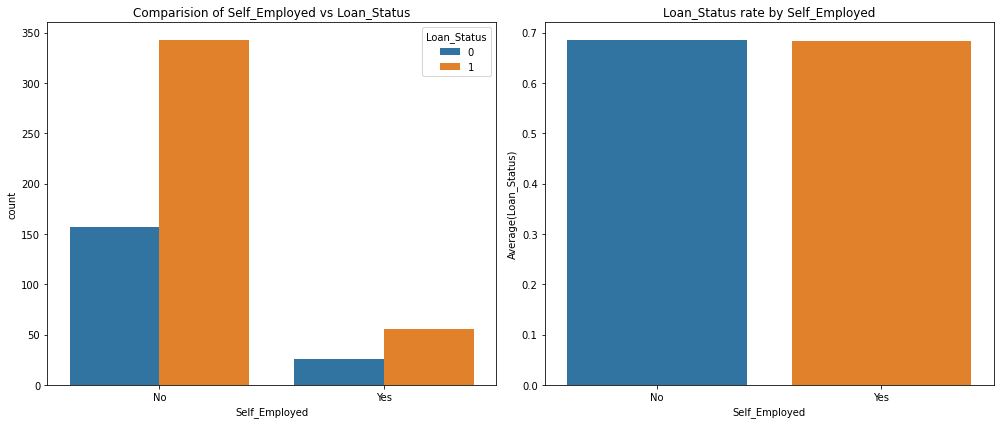

In [34]:
CatVar_targetPlots(df,"Self_Employed")



Data Cleaning

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
#impute gender, married, dependents, Self_Employed with mode since they are categorical features
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [38]:
#impute the LoanAmount, Loan_Amount_Term, Credit_History with median data because they are skewed

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())



In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1



**Handling Categorical Data**

In [41]:
#take a copy of the data
encoded_df = df.copy()

In [42]:
#convert 'Gender' -> Male to 1 and Female to 0
encoded_df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

#convert the Married variable Yes to 1 and No to 0
encoded_df["Married"] = df["Married"].map({"Yes" : 1, "No" : 0})

#convert the Self_Employed variable Yes to 1 and No to 0
encoded_df["Self_Employed"] = df["Self_Employed"].map({"Yes" : 1, "No" : 0})

#education: there is an order inolved. Graduate > Not graduate
encoded_df["Education"] = df["Education"].map({"Graduate" : 2, "Not Graduate" : 1})

#education: there is an order inolved. Graduate > Not graduate
encoded_df["Property_Area"] = df["Property_Area"].map({"Rural" : 1, "Semiurban" : 2, "Urban" : 3})

#replace dependents 3+ with 3.
encoded_df["Dependents"] = df["Dependents"].map({"3+" : 3, "1": 1, "2": 2, "0" : 0})

In [43]:
encoded_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,2,0,5849,0.0,128.0,360.0,1.0,3,1
1,LP001003,1,1,1,2,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,2,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,0,0,2,0,6000,0.0,141.0,360.0,1.0,3,1


In [44]:
#removing the loan Id feature, since it doesn't give any predictive power
encoded_df.drop(["Loan_ID"], axis = 1, inplace=True)



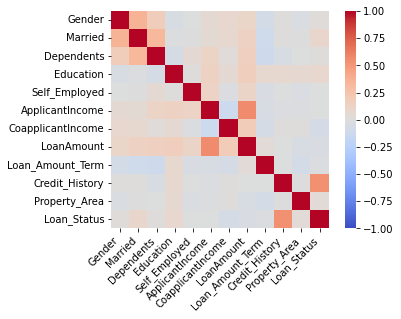

In [45]:


#correlation matrix
corr_matrix = encoded_df.corr()

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


Gender and Married Features are correlated among themselves (auto correlation). We can drop Married feature because we know that the Gender is an important feature from our data analysis.


In [46]:
featurecolumns = encoded_df.columns.difference(['Gender', 'Loan_Status'])
featurecolumns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'LoanAmount', 'Loan_Amount_Term', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')

In [47]:
x = encoded_df[featurecolumns]
y = encoded_df['Loan_Status']

In [48]:
#80% training data and 20% test data

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 47)

In [49]:
#check the proportion of data
y_train.value_counts(normalize = True) * 100

1    68.635438
0    31.364562
Name: Loan_Status, dtype: float64

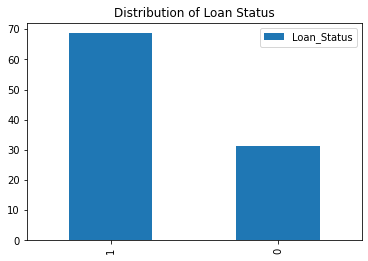

In [50]:
pd.DataFrame(y_train.value_counts(normalize = True) * 100).plot(kind = "bar")
plt.title("Distribution of Loan Status")
plt.show()

In [76]:

#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}



In [77]:
#Cross-Validation and Hyper Parameters Tuning
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}


In [78]:
#Decision Tree classifier with gini index
clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [79]:
#fit the model with train data
clf_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                             

In [80]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_



{'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__max_features': 4,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 9}

In [81]:
clf_model.best_score_

0.8105751391465678

In [82]:
bankloans_test_pred_dt = pd.DataFrame({'actual':y_test, 'predicted': clf_model.predict(x_test)})
bankloans_test_pred_dt = bankloans_test_pred_dt.reset_index(drop = True)

#predicted probability
bankloans_test_pred_dt["predicted_prob"] = pd.DataFrame([p[1] for p in clf_model.predict_proba(x_test)])

bankloans_test_pred_dt.head()

,actual,predicted,predicted_prob
0,1,1,0.663265
1,1,1,0.781690
2,1,1,0.781690
3,1,1,0.781690
4,0,0,0.150000


In [83]:
print(metrics.classification_report(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



In [84]:
#confusion matrix
metrics.confusion_matrix(bankloans_test_pred_dt.actual,bankloans_test_pred_dt.predicted)

array([[18, 20],
       [ 2, 83]])

In [85]:
#compute f1 score
metrics.f1_score(bankloans_test_pred_dt.actual, bankloans_test_pred_dt.predicted)



0.8829787234042553

In [86]:
from six import StringIO 
#write the dot data
dot_data = StringIO()

In [87]:
#saving into a variable to get graph
clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']



In [88]:
#export the decision tree along with the feature names into a dot file format
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pdot
import graphviz as graphviz
export_graphviz(clf_best_model,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names = x_train.columns.values,class_names = ["No","Yes"])

In [89]:
#make a graph from dot file 
graph = pdot.graph_from_dot_data(dot_data.getvalue())

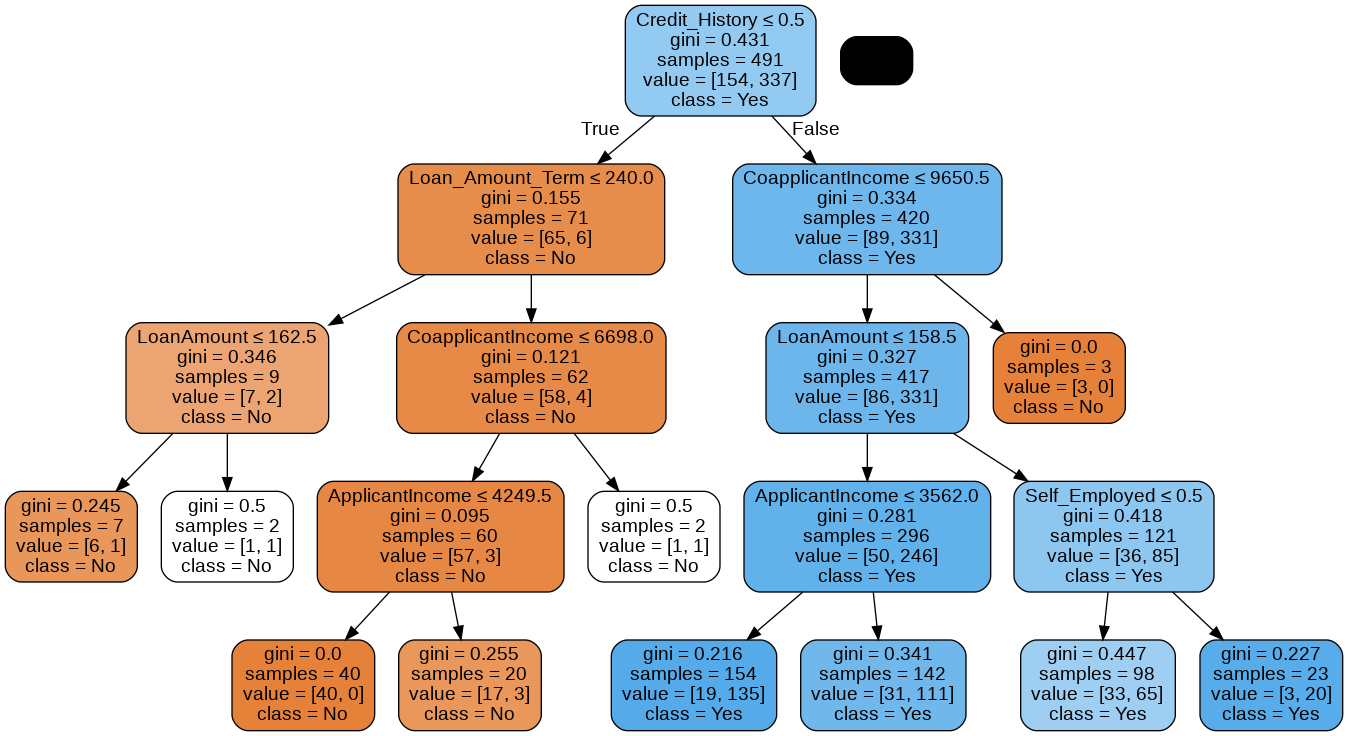

In [90]:
Image(graph.create_png())